### Assignment: A
1. What are the 2 widely used libraries for data visualization?
      - Matplotlib
      - Seaborn
2. List 3 advantages of each?
    * Matplotlib
      - has a large active community hence a lot of resources such as tutorials and documentations have been made available online by the developers
      - it is very flexible since it allows users to include different styles, markers and create almost any plot they want

    * Seaborn
      - specializes on statistical visualizations and well suited for exploring complex datasets
      - allows straightforward data representation on plots and attractive aesthetics

### Types of plots to consider today:
1. Line chart
2. Scatter plot
3. Bar chart
4. Histogram
5. Heatmap
6. Pie chart
7. Countplot

### Assignment: B
1. Explore plotly library and replicate the above plots

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Loan payments data.csv",
                 parse_dates=['effective_date', 'due_date', 'paid_off_time'])
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


In [4]:
df.shape

(500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


### Checking and removing missing values

In [6]:
# checking for missing values
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
# replacing missing values with 0s
df['paid_off_time'] = df['paid_off_time'].fillna(0)
df['past_due_days'] = df['past_due_days'].fillna(0)

In [8]:
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

### 1. Line chart

### Visualizing the time series data using line charts

In [6]:
df.head(20)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,0.0,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,0.0,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,0.0,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,0.0,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,0.0,26,college,male


In [19]:
df.paid_off_time.head(20)

0    2016-09-14 19:31:00
1    2016-10-07 09:00:00
2    2016-09-25 16:58:00
3    2016-09-22 20:00:00
4    2016-09-23 21:36:00
5    2016-09-09 13:45:00
6    2016-10-07 23:07:00
7    2016-10-05 20:33:00
8    2016-10-08 16:00:00
9    2016-09-24 13:00:00
10   2016-09-11 19:11:00
11   2016-10-09 16:00:00
12   2016-10-07 23:32:00
13   2016-09-13 21:57:00
14   2016-09-15 14:27:00
15   2016-09-24 16:00:00
16   2016-09-27 14:21:00
17   2016-09-23 18:49:00
18   2016-10-05 22:05:00
19   2016-09-23 07:42:00
Name: paid_off_time, dtype: datetime64[ns]

In [23]:
df.paid_off_time = pd.to_datetime(df.paid_off_time)
df.paid_off_time.head(20)

0    2016-09-14 19:31:00
1    2016-10-07 09:00:00
2    2016-09-25 16:58:00
3    2016-09-22 20:00:00
4    2016-09-23 21:36:00
5    2016-09-09 13:45:00
6    2016-10-07 23:07:00
7    2016-10-05 20:33:00
8    2016-10-08 16:00:00
9    2016-09-24 13:00:00
10   2016-09-11 19:11:00
11   2016-10-09 16:00:00
12   2016-10-07 23:32:00
13   2016-09-13 21:57:00
14   2016-09-15 14:27:00
15   2016-09-24 16:00:00
16   2016-09-27 14:21:00
17   2016-09-23 18:49:00
18   2016-10-05 22:05:00
19   2016-09-23 07:42:00
Name: paid_off_time, dtype: datetime64[ns]

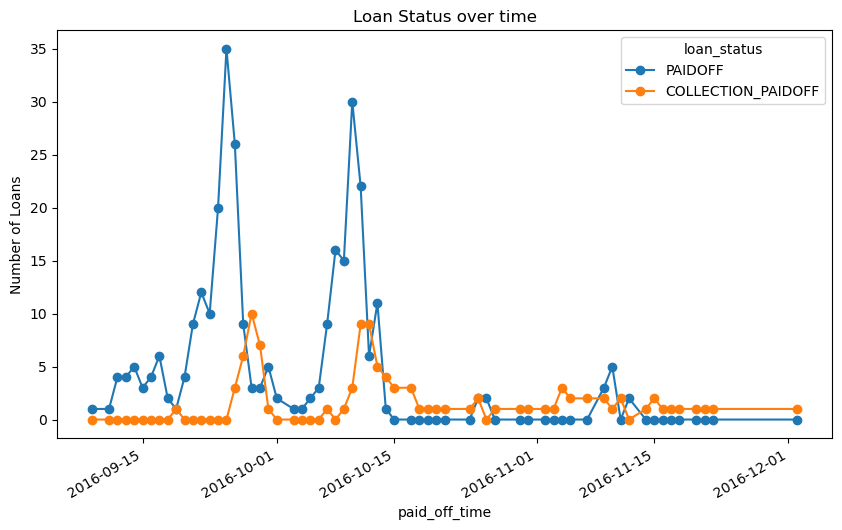

In [28]:
agg_data = df.groupby([pd.Grouper(key='paid_off_time', freq='D'), 'loan_status']).size().unstack(fill_value=0)
agg_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Loan Status over time')
plt.ylabel('Number of Loans')
plt.show()

### 2. Scatter plot

In [5]:
df.head(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,2016-09-09,2016-09-15,2016-09-09 13:45:00,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-07 23:07:00,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-05 20:33:00,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-08 16:00:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,2016-09-10,2016-09-24,2016-09-24 13:00:00,NaN,26,college,male


### 3. Bar Chart

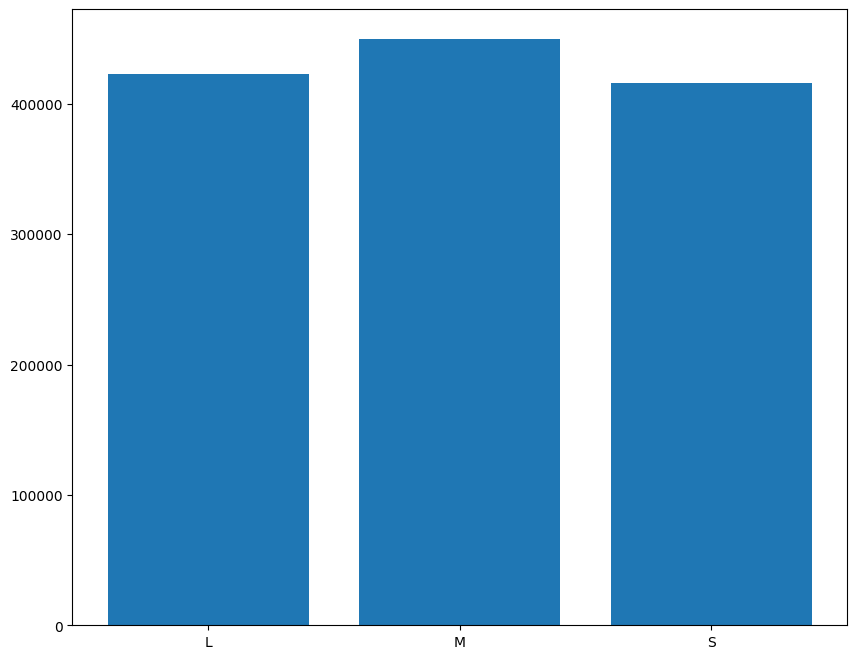

In [ ]:
salary = df['salary']
size = df['company_size']
plt.figure(figsize = (10, 8))
plt.bar(size, salary,)
plt.show()

### 4. Histogram

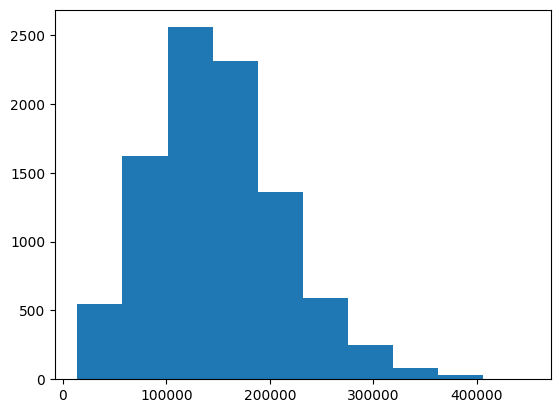

In [ ]:
plt.hist(salary)
plt.show()

## 5. Heatmap


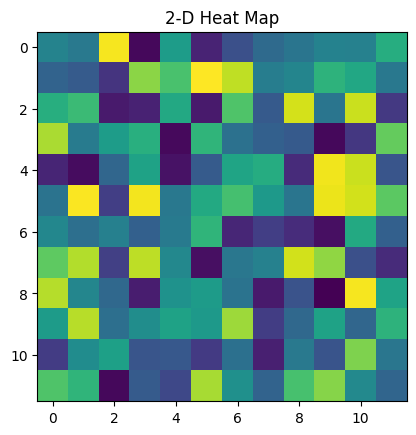

In [ ]:
data = np.random.random(( 12 , 12 ))
plt.imshow( data )

plt.title( "2-D Heat Map" )
plt.show()

### 6. Pie Chart

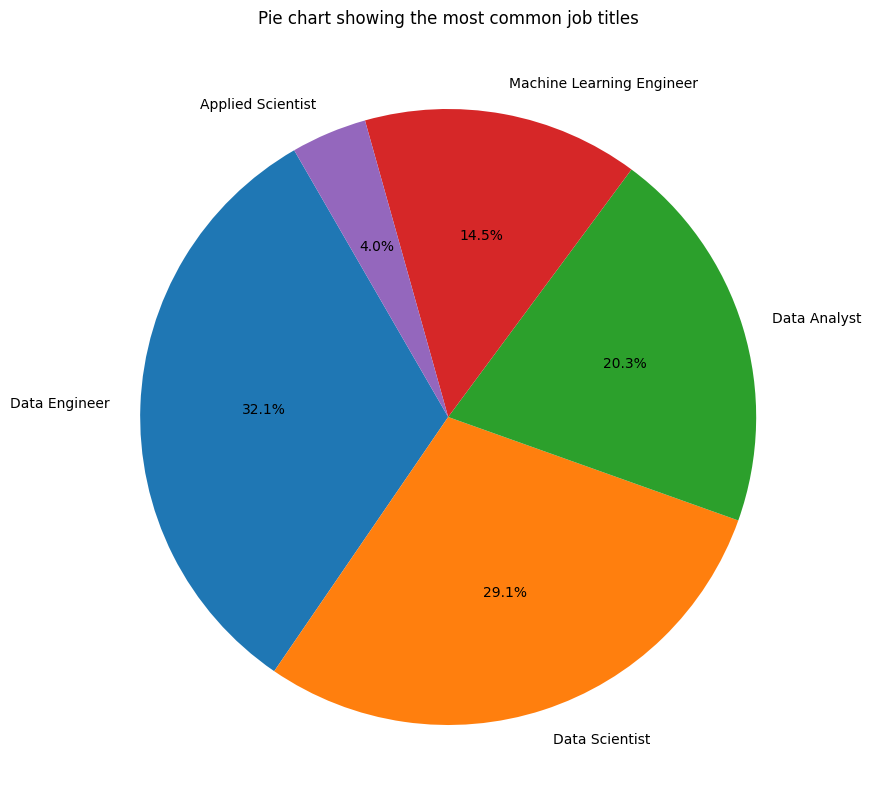

In [ ]:
job_titles = df['job_title'].value_counts()

common_job_title = job_titles[job_titles >= 272]
common_job_title.value_counts()

plt.figure(figsize=(10, 10))
job_title_labels = common_job_title.index
plt.pie(common_job_title, labels= job_title_labels, autopct='%1.1f%%', startangle=120)
plt.title("Pie chart showing the most common job titles")
plt.show()

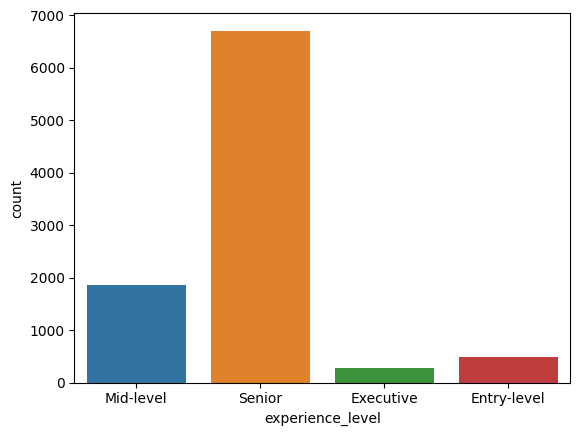

In [ ]:
sns.countplot(x='experience_level', hue='experience_level',data=df);